In [1]:
import numpy as np

# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import math


def norm(images):
    images = images.astype(np.float32)
    images = np.multiply(images, 1.0 / 255.0)
    return images

X_train, y_train = norm(train['features']), train['labels']
X_test, y_test = norm(test['features']), test['labels']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, stratify = y_train )

y_val = np_utils.to_categorical(y_val, 43)
y_train = np_utils.to_categorical(y_train, 43)
y_test = np_utils.to_categorical(y_test, 43)

model3 = Sequential()
model3.add(Conv2D(32, 3, 3, input_shape=(32, 32, 3), activation='relu'))
print(model3.output_shape)
model3.add(Flatten())
print(model3.output_shape)
model3.add(Dense(128, activation='relu'))
print(model3.output_shape)
model3.add(Dense(43, activation='softmax'))
print(model3.output_shape)

model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
earlystop= EarlyStopping(min_delta= 0.008, patience= 1, verbose=1)
model3.fit(X_train, y_train,
                    batch_size=128, nb_epoch=20,
                    verbose=1, validation_data=(X_val, y_val), callbacks = [earlystop])

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

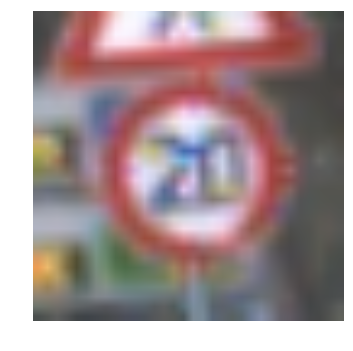

In [5]:
plt.imshow(X_train[2])
plt.axis('off')  # clear x- and y-axes
plt.show()

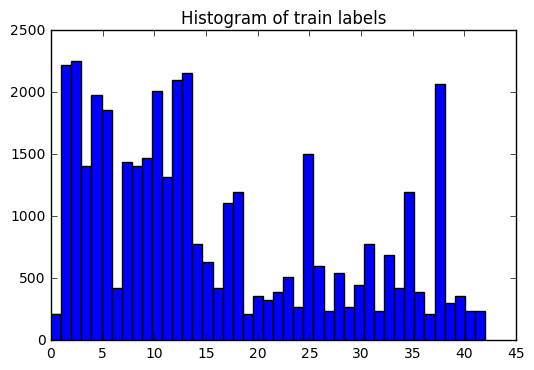

In [6]:
plt.hist(y_train, n_classes)
plt.title("Histogram of train labels")
plt.show()

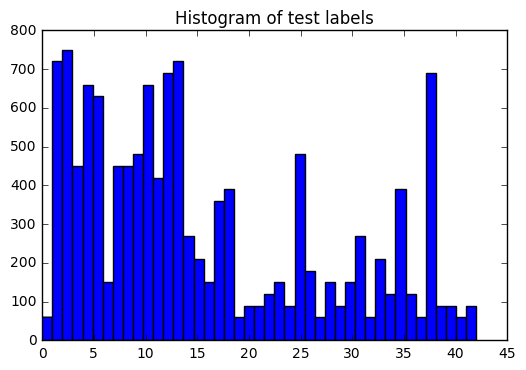

In [7]:
plt.hist(y_test, n_classes)
plt.title("Histogram of test labels")
plt.show()

In [8]:
import imageio
imageio.plugins.ffmpeg.download()

Imageio: 'ffmpeg.linux64' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg.linux64 (27.2 MB)
Downloading: 8192/28549024 bytes (0.0%)237568/28549024 bytes (0.8%)630784/28549024 bytes (2.2%)1097728/28549024 bytes (3.8%)1474560/28549024 bytes (5.2%)1933312/28549024 bytes (6.8%)2441216/28549024 bytes (8.6%)2867200/28549024 bytes (10.0%)3309568/28549024 bytes (11.6%)3538944/28549024 bytes (12.4%)4210688/28549024 bytes (14.7%)4366336/28549024 bytes (15.3%)4734976/28549024 bytes (16.6%)5226496/28549024 bytes (18.3%)

In [9]:
import moviepy.editor as mpy
from IPython.display import HTML

index = 0
def make_frame(t):
    global index
    index = index + 1
    return X_train[index] # returns a 8-bit RGB array

train_output = 'train.mp4'
clip = mpy.VideoClip(make_frame, duration=20) # 20 seconds
%time clip.write_videofile(train_output, audio=False, fps=1960)

[MoviePy] >>>> Building video train.mp4
[MoviePy] Writing video train.mp4


100%|█████████▉| 39200/39201 [01:47<00:00, 365.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: train.mp4 

CPU times: user 11.1 s, sys: 3.98 s, total: 15 s
Wall time: 1min 47s


In [10]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(train_output))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [11]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


gray_X_train = np.array([np.array(grayscale(img)) for img in X_train])
gray_X_test = np.array([np.array(grayscale(img)) for img in X_test])

In [12]:
gray_X_train[0].shape

(32, 32)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
> The paper said to convert the images to gray scale. 
> After reviewing the signs it seems that for this dataset the colors do not 
> add more information for clasifying the dataset.

In [13]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

## Future work create more data through jittering

## Leave testing alone.
## Create validation through taking 1% example from each class
## Create train dataset by randomizing indexes


import tensorflow as tf
from tensorflow.contrib.learn.python.learn.datasets import base
from tensorflow.contrib.learn.python.learn.datasets.mnist import DataSet
from sklearn.model_selection import train_test_split

y_train_ind = []

with tf.Session() as sess:
    y_train_ind = sess.run(tf.one_hot(y_train, n_classes))

train_images, validation_images, train_labels,  validation_labels = \
train_test_split(gray_X_train, y_train_ind, test_size=0.33, random_state=42)

y_test_ind = []

with tf.Session() as sess:
    y_test_ind = sess.run(tf.one_hot(y_test, n_classes))

train = DataSet(train_images, train_labels, reshape=False)
validation = DataSet(validation_images, validation_labels, reshape=False)
test = DataSet(gray_X_test, y_test_ind, reshape=False)

gtsd = base.Datasets(train=train, validation=validation, test=test)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
> I split the training set into training 66% and testing 33%. I left the test set as is. It was essential for the train and validation set to be randomized because images of the same class were close together which causes update issues. Since the model doesn't learn as much when consecutive examples are similar.

In [19]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
layer_width = {
    'kernel' : 3,
    'layer_1': 6,
    'layer_2': 16,
    'fully_connected_1': 128
}

# Store layers weight & bias
weights = {
    'layer_1': tf.get_variable("conv1_w", shape=[3, 3, 1, layer_width['layer_1']],
                               initializer=tf.contrib.layers.xavier_initializer()),
    'layer_2': tf.get_variable("conv2_w", shape=[3, 3, layer_width['layer_1'], layer_width['layer_2']],
                               initializer=tf.contrib.layers.xavier_initializer()),
    'fully_connected_1': tf.get_variable("fc_w", shape=[7 * 7 * layer_width['layer_2'], layer_width['fully_connected_1']]
                                         , initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable("out_w", shape=[layer_width['fully_connected_1'], n_classes],
                      initializer=tf.contrib.layers.xavier_initializer()),
}
biases = {
    'layer_1': tf.Variable(tf.zeros(layer_width['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_width['layer_2'])),
    'fully_connected_1': tf.Variable(tf.zeros(layer_width['fully_connected_1'])),
    'out': tf.Variable(tf.zeros(n_classes))
}


def conv2d(x, W, b, strides=1, padding='SAME'):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

# LeNet architecture:
# INPUT -> CONV -> ACT -> POOL -> CONV -> ACT -> POOL -> FLATTEN -> FC -> ACT -> FC
#
# Don't worry about anything else in the file too much, all you have to do is
# create the LeNet and return the result of the last fully connected layer.
def LeNet(x):
    # Reshape from 2D to 4D. This prepares the data for
    # convolutional and pooling layers.
    x = tf.reshape(x, (-1, 32, 32, 1))
    # TODO: Define the LeNet architecture.
    # Layer 1 - 32*32*1 to 14x14x6
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'], padding='VALID')
    print(conv1.get_shape())
    conv1 = maxpool2d(conv1)
    print(conv1.get_shape())

    # Layer 2 - 14x14x6 to 5*5*16
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'], padding='VALID')
    print(conv2.get_shape())
    conv2 = maxpool2d(conv2)
    print(conv2.get_shape())

    # Fully connected layer - 5*5*16 to 512
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.contrib.layers.flatten(conv2)
    print(fc1.get_shape())

    fc1 = tf.matmul(fc1, weights['fully_connected_1']) + biases['fully_connected_1']
    print(fc1.get_shape())
    fc1 = tf.nn.relu(fc1)
    print(fc1.get_shape())

    # Output Layer - class prediction - 128 to 43
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    print(out.get_shape())


    # Return the result of the last fully connected layer.

    return out


# GTSD consists of 32x32x3, grayscale images
x = tf.placeholder(tf.float32, (None, 32, 32), name="images")
# Classify over n_classes
y = tf.placeholder(tf.float32, (None, n_classes), name="labels")
fc2 = LeNet(x)

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(fc2, y))
opt = tf.train.AdamOptimizer()
train_op = opt.minimize(loss_op)
correct_prediction = tf.equal(tf.argmax(fc2, 1), tf.argmax(y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


def eval_data(dataset):
    """
    Given a dataset as input returns the loss and accuracy.
    """
    # If dataset.num_examples is not divisible by BATCH_SIZE
    # the remainder will be discarded.
    # Ex: If BATCH_SIZE is 64 and training set has 55000 examples
    # steps_per_epoch = 55000 // 64 = 859
    # num_examples = 859 * 64 = 54976
    #
    # So in that case we go over 54976 examples instead of 55000.
    steps_per_epoch = dataset.num_examples // BATCH_SIZE
    num_examples = steps_per_epoch * BATCH_SIZE
    total_acc, total_loss = 0, 0
    for step in range(steps_per_epoch):
        batch_x, batch_y = dataset.next_batch(BATCH_SIZE)
        loss, acc = sess.run([loss_op, accuracy_op], feed_dict={x: batch_x, y: batch_y})
        total_acc += (acc * batch_x.shape[0])
        total_loss += (loss * batch_x.shape[0])
    return total_loss/num_examples, total_acc/num_examples

(?, 30, 30, 6)
(?, 15, 15, 6)
(?, 13, 13, 16)
(?, 7, 7, 16)
(?, 784)
(?, 128)
(?, 128)
(?, 43)


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
![Reference Architecture](traffic-sign-net-v2.png)

- What's the final model type?
  - It's a convolutional neural network. 
- The number of layers in the model
  - 6


In [21]:
### Train your model here.
### Feel free to use as many code cells as needed.

EPOCHS = 10
BATCH_SIZE = 128


def eval_data(dataset):
    """
    Given a dataset as input returns the loss and accuracy.
    """
    # If dataset.num_examples is not divisible by BATCH_SIZE
    # the remainder will be discarded.
    # Ex: If BATCH_SIZE is 64 and training set has 55000 examples
    # steps_per_epoch = 55000 // 64 = 859
    # num_examples = 859 * 64 = 54976
    #
    # So in that case we go over 54976 examples instead of 55000.
    steps_per_epoch = dataset.num_examples // BATCH_SIZE
    num_examples = steps_per_epoch * BATCH_SIZE
    total_acc, total_loss = 0, 0
    for step in range(steps_per_epoch):
        batch_x, batch_y = dataset.next_batch(BATCH_SIZE)
        loss, acc = sess.run([loss_op, accuracy_op], feed_dict={x: batch_x, y: batch_y})
        total_acc += (acc * batch_x.shape[0])
        total_loss += (loss * batch_x.shape[0])
    return total_loss/num_examples, total_acc/num_examples


saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    steps_per_epoch = gtsd.train.num_examples // BATCH_SIZE
    num_examples = steps_per_epoch * BATCH_SIZE

    # Train model
    for i in range(EPOCHS):
        for step in range(steps_per_epoch):
            batch_x, batch_y = gtsd.train.next_batch(BATCH_SIZE)
            loss = sess.run(train_op, feed_dict={x: batch_x, y: batch_y})

        val_loss, val_acc = eval_data(gtsd.validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation loss = {:.3f}".format(val_loss))
        print("Validation accuracy = {:.3f}".format(val_acc))

    # Evaluate on the test data
    test_loss, test_acc = eval_data(gtsd.test)
    print("Test loss = {:.3f}".format(test_loss))
    print("Test accuracy = {:.3f}".format(test_acc))
    save_path = saver.save(sess, "./model.ckpt")

EPOCH 1 ...
Validation loss = 1.611
Validation accuracy = 0.587
EPOCH 2 ...
Validation loss = 0.762
Validation accuracy = 0.805
EPOCH 3 ...
Validation loss = 0.549
Validation accuracy = 0.850
EPOCH 4 ...
Validation loss = 0.406
Validation accuracy = 0.898
EPOCH 5 ...
Validation loss = 0.337
Validation accuracy = 0.914
EPOCH 6 ...
Validation loss = 0.290
Validation accuracy = 0.923
EPOCH 7 ...
Validation loss = 0.261
Validation accuracy = 0.932
EPOCH 8 ...
Validation loss = 0.226
Validation accuracy = 0.944
EPOCH 9 ...
Validation loss = 0.218
Validation accuracy = 0.946
EPOCH 10 ...
Validation loss = 0.201
Validation accuracy = 0.952
Test loss = 0.906
Test accuracy = 0.850


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**


> AdamOptimizer
> EPOCHS = 10
> BATCH_SIZE = 128
> filter size = 3

>  layer_width = {
>     'kernel' : 3,
>     'layer_1': 6,
>     'layer_2': 16,
>     'fully_connected_1': 128
> }

> weights = {
>     'layer_1': tf.Variable(tf.truncated_normal(
>         [3, 3, 1, layer_width['layer_1']])),
>     'layer_2': tf.Variable(tf.truncated_normal(
>         [3, 3, layer_width['layer_1'], layer_width['layer_2']])),
>     'fully_connected_1': tf.Variable(tf.truncated_normal(
>         [7 * 7 * layer_width['layer_2'], layer_width['fully_connected_1']])),
>     'out': tf.Variable(tf.truncated_normal(
>         [layer_width['fully_connected_1'], n_classes]))
> }

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

From Traffic Sign Recognition with Multi-Scale Convolutional Networks:


>The approach is based on Convolutional Networks (ConvNets) [8], [9], a biologically-inspired, multi- layer feed-forward architecture that can learn multiple stages of invariant features using a combination of supervised and unsupervised learning (see Figure 2). Each stage is composed of a (convolutional) filter bank layer, a non-linear transform layer, and a spatial feature pooling layer. The spatial pooling layers lower the spatial resolution of the representation, thereby making the representation robust to small shifts and geometric distortions, similarly to “complex cells” in standard models of the visual cortex.

- Why is the convolutional layer well suited here?
  - because it allows for the sharing of local weights between layers. which leads to faster learning and a natural interpretation of the layers
- Did you try out any other architecture? If so, how did you end up with the final one?
  - No I didn't.
- Why choose RELU activation?
  - It allows the network to solve more complex problems. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

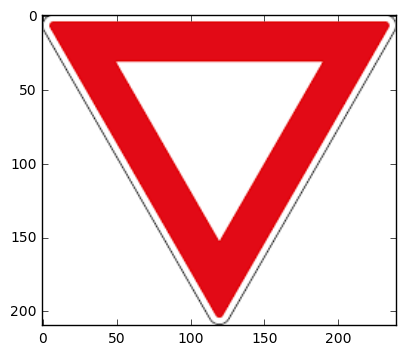

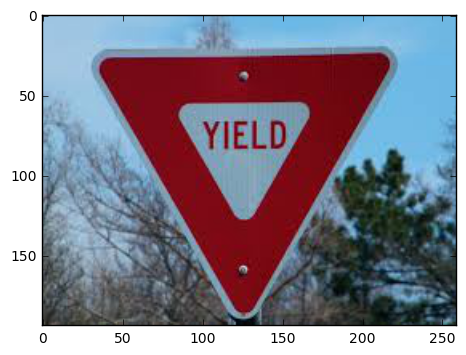

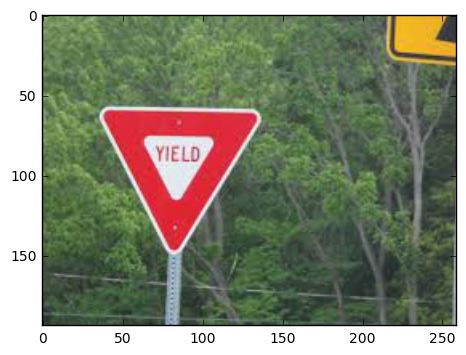

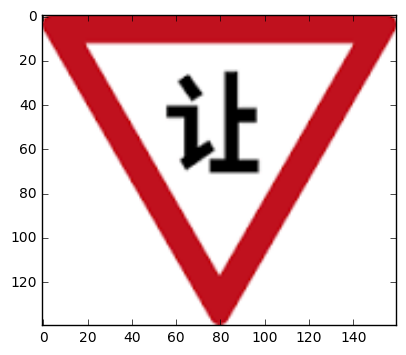

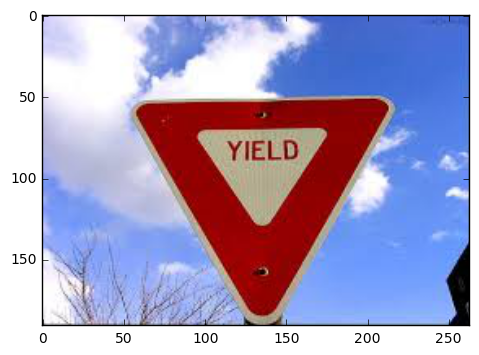

In [15]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display, Image
import PIL
from glob import glob
images = [ PIL.Image.open(f) for f in glob('yeild/*') ]

def img2array(im):
    if im.mode != 'RGB':
        im = im.convert(mode='RGB')
    return np.fromstring(im.tobytes(), dtype='uint8').reshape((im.size[1], im.size[0], 3))

yeild_images = [ img2array(im) for im in images ]
for img in yeild_images:
    plt.figure()
    plt.imshow(img)
    

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I chose an assortment of yeild signs. Small and large, with and without a background, and 1 a skewed perspective. The skewed perspective is unlike yeild images seen in the dataset making it hard to predict. Also the proprotion of sizes make interpolation hard and can skew results.

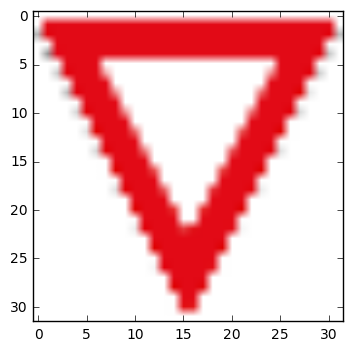

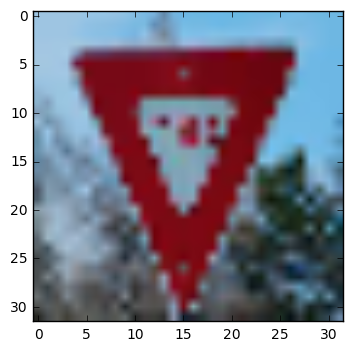

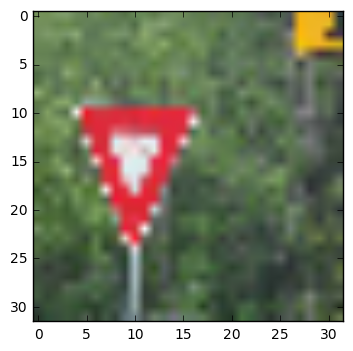

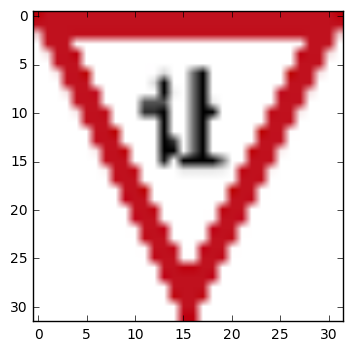

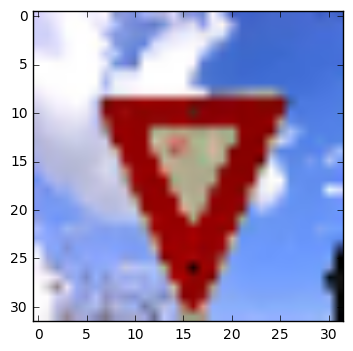

In [16]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
network_image = [cv2.resize(img,(32, 32), interpolation = cv2.INTER_CUBIC) for img in yeild_images]
for img in network_image:
    plt.figure()
    plt.imshow(img)

custom_label = []
with tf.Session() as sess:
    custom_label = sess.run(tf.one_hot([13,13,13,13,13], n_classes))
    
custom_train = np.array([np.array(grayscale(img)) for img in network_image])



In [22]:

saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, "./model.ckpt")
    encoded_labels = sess.run(tf.one_hot([0,0,0], n_classes))
    loss, acc, logits = sess.run([loss_op, accuracy_op, fc2],
                                     feed_dict={x: custom_train, y: custom_label})
    prob = sess.run(tf.nn.softmax(logits))
    pred_class = sess.run(tf.argmax(logits, 1))
    top_prob = sess.run(tf.nn.top_k(prob, k=3))
    
    print ("Accuracy: %f" % (acc))
    print ("Prediction Classes:",(pred_class))
    print ("Top 3 Probabilties:",(top_prob))

Accuracy: 0.800000
Prediction Classes: [13 13  1 13 13]
Top 3 Probabilties: TopKV2(values=array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]], dtype=float32), indices=array([[13,  0,  1],
       [13,  0,  1],
       [ 1,  0,  2],
       [13,  0,  1],
       [13,  0,  1]], dtype=int32))


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The accuracy is 80%. 

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

The model is certain in all of it's predictions. They are sometimes incorrect. The correct class shows up 1st or not at all.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.